In [4]:

import pandas as pd
import warnings; 
warnings.simplefilter('ignore')

#Yahoo Finance API´s
import yahoo_fin.stock_info as yf
tickers = yf.tickers_sp500()

# Prophet
from prophet import Prophet
#from prophet.plot import plot_plotly
#Darts
from darts import TimeSeries
#from darts.models import ExponentialSmoothing

# Interactive plots

import time
import datetime

In [5]:
stock = yf.get_data("TSLA", start_date = '01/01/1999', end_date = None, index_as_date = True, interval = "1d")
stock["date"] = pd.to_datetime(stock.index)
stock.reset_index(inplace=True)
stock_data = stock[["close",  "date"]]
stock_data.columns = ['y', 'ds']

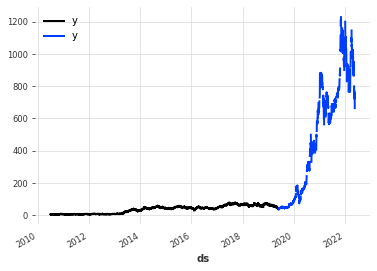

In [11]:
series = TimeSeries.from_dataframe(stock_data,  "ds", "y", fill_missing_dates=True, freq="D")
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

In [10]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(stock_data)
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast

Initial log joint probability = -73.3133
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       7541.73      0.033642       1007.79           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       7724.16      0.073529       2499.13           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       7761.69   5.15852e-05       255.673    2.86e-07       0.001      386  LS failed, Hessian reset 
     299       7765.42   0.000942724       270.246           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       7776.61    0.00490062       937.492      0.2759           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       7779.74   0.000225504    

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,3.878189,-115.416840,89.870507,3.878189,3.878189,-15.818695,-15.818695,-15.818695,-3.577801,...,0.378459,0.378459,0.378459,-12.619354,-12.619354,-12.619354,0.0,0.0,0.0,-11.940506
1,2010-06-30,3.890094,-118.354122,87.421013,3.890094,3.890094,-15.153019,-15.153019,-15.153019,-3.577801,...,0.331232,0.331232,0.331232,-11.906451,-11.906451,-11.906451,0.0,0.0,0.0,-11.262926
2,2010-07-01,3.901998,-119.249172,92.951494,3.901998,3.901998,-15.379571,-15.379571,-15.379571,-3.577801,...,-0.651650,-0.651650,-0.651650,-11.150121,-11.150121,-11.150121,0.0,0.0,0.0,-11.477573
3,2010-07-02,3.913903,-108.556124,100.261941,3.913903,3.913903,-15.491429,-15.491429,-15.491429,-3.577801,...,-1.545453,-1.545453,-1.545453,-10.368175,-10.368175,-10.368175,0.0,0.0,0.0,-11.577526
4,2010-07-06,3.961520,-111.768268,95.172343,3.961520,3.961520,-10.556160,-10.556160,-10.556160,-3.577801,...,0.378459,0.378459,0.378459,-7.356819,-7.356819,-7.356819,0.0,0.0,0.0,-6.594640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,2022-08-24,1200.371041,1095.664837,1298.886258,1192.590448,1208.697925,-4.905523,-4.905523,-4.905523,-3.577801,...,0.331232,0.331232,0.331232,-1.658955,-1.658955,-1.658955,0.0,0.0,0.0,1195.465518
3092,2022-08-25,1201.505192,1091.190753,1298.641250,1193.557909,1209.977595,-6.006153,-6.006153,-6.006153,-3.577801,...,-0.651650,-0.651650,-0.651650,-1.776702,-1.776702,-1.776702,0.0,0.0,0.0,1195.499040
3093,2022-08-26,1202.639343,1085.204859,1295.801894,1194.538595,1211.257266,-7.038684,-7.038684,-7.038684,-3.577801,...,-1.545453,-1.545453,-1.545453,-1.915431,-1.915431,-1.915431,0.0,0.0,0.0,1195.600659
3094,2022-08-27,1203.773494,1093.386325,1306.073327,1195.576652,1212.536937,-5.194659,-5.194659,-5.194659,-3.577801,...,0.447225,0.447225,0.447225,-2.064084,-2.064084,-2.064084,0.0,0.0,0.0,1198.578835
